## Download the Data

In [6]:
import pandas as pd

In [8]:
df =pd.read_csv('Accident_car_1ml.csv')

## Data Preparation and Cleaning

* Look at some information about the data and columns
* Fix any missing or incorrect values

In [10]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0.0,0.0,1000000.000000,984702.000000,539411.000000,983447.000000,987624.000000,981069.000000,899602.000000,524684.000000
mean,499999.500000,499999.500000,2.320200,36.059323,-94.753951,NaN,NaN,0.167486,64.619012,59.439159,66.026522,29.693616,9.173668,7.767917,0.013259
std,288675.278933,288675.278933,0.548478,4.906870,17.391816,NaN,NaN,1.427785,17.450734,21.930704,21.890455,0.792132,2.259461,5.408117,0.203154
min,0.000000,0.000000,1.000000,24.554800,-124.497414,NaN,NaN,0.000000,-77.800000,-50.000000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,249999.750000,249999.750000,2.000000,32.925510,-117.370224,NaN,NaN,0.000000,54.000000,43.000000,50.000000,29.560000,10.000000,4.600000,0.000000
50%,499999.500000,499999.500000,2.000000,35.258339,-87.957626,NaN,NaN,0.000000,66.900000,64.000000,68.000000,29.910000,10.000000,7.000000,0.000000
75%,749999.250000,749999.250000,3.000000,40.113201,-80.919167,NaN,NaN,0.010000,77.000000,76.000000,84.000000,30.050000,10.000000,10.400000,0.000000
max,999999.000000,999999.000000,4.000000,48.998085,-68.160789,NaN,NaN,336.570007,196.000000,196.000000,100.000000,58.100000,111.000000,822.800000,36.470000


In [11]:
numerics = ['int16','int32','int64','float16','float32','float64']

numeric_df = df.select_dtypes(include=numerics)

In [12]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lat                  1.000000
End_Lng                  1.000000
Precipitation(in)        0.475316
Wind_Chill(F)            0.460589
Wind_Speed(mph)          0.100398
Visibility(mi)           0.018931
Weather_Condition        0.018211
Humidity(%)              0.016553
Temperature(F)           0.015298
Wind_Direction           0.013570
Pressure(in)             0.012376
Weather_Timestamp        0.009927
Street                   0.001712
Nautical_Twilight        0.001636
Civil_Twilight           0.001636
Sunrise_Sunset           0.001636
Astronomical_Twilight    0.001636
Airport_Code             0.001432
Timezone                 0.000451
Zipcode                  0.000136
City                     0.000028
Description              0.000001
Source                   0.000000
ID                       0.000000
Severity                 0.000000
Junction                 0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop          

<Axes: >

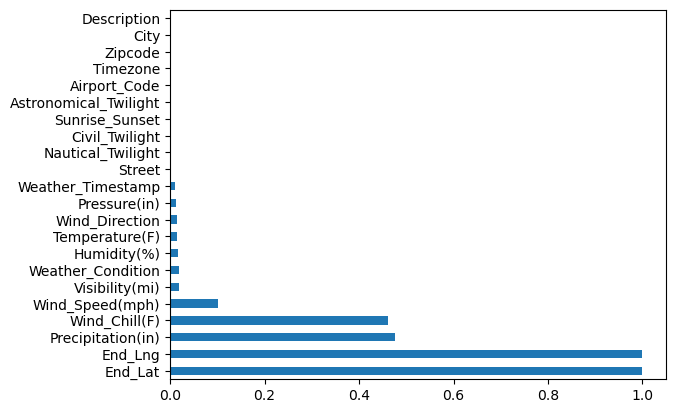

In [13]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

## Exploratory Analysis and Visualization
Columns we will analyze:

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temerature
5. Weather Condition


In [28]:
cities = df.City.unique()
len(cities)

8742

In [36]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:15]

City
Houston         39763
Dallas          28160
Los Angeles     26561
Austin          22988
Atlanta         14400
Charlotte       13969
Orlando         11322
Miami           10874
Sacramento      10647
San Diego        8311
Seattle          8286
San Antonio      7938
Omaha            7765
Dayton           7730
Grand Rapids     6917
Name: count, dtype: int64

<Axes: ylabel='City'>

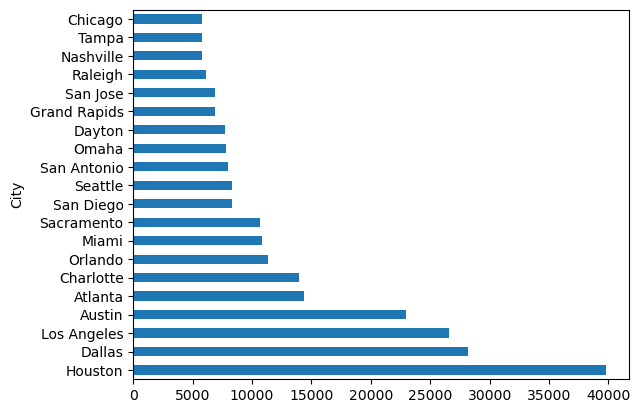

In [40]:
cities_by_accident[:20].plot(kind='barh')

In [48]:
import seaborn as sns
sns.set_style("darkgrid")

C:\Users\User\AppData\Local\Temp\ipykernel_21900\3405282844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='count', ylabel='Density'>

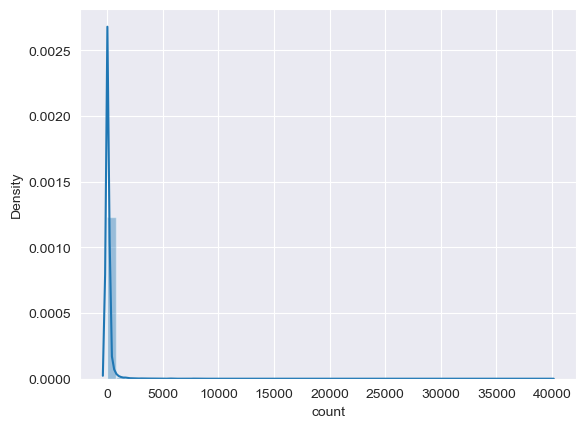

In [52]:
sns.distplot(cities_by_accident)

In [54]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident <= 1000]

In [56]:
len(high_accident_cities) / len(cities)

0.017501715854495538

In [60]:
len(low_accident_cities) / len(cities)


0.9823838938458018

C:\Users\User\AppData\Local\Temp\ipykernel_21900\2843252471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities)


<Axes: xlabel='count', ylabel='Density'>

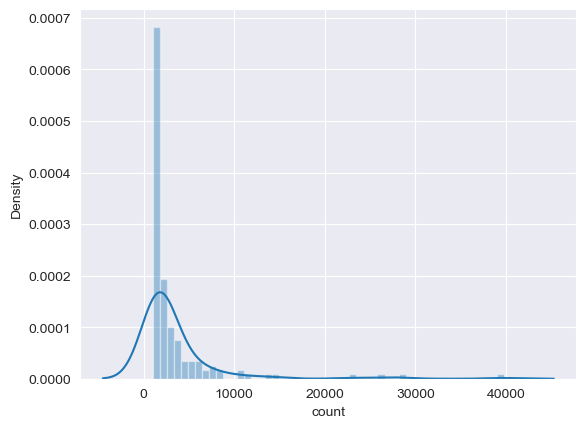

In [64]:
sns.distplot(high_accident_cities)

C:\Users\User\AppData\Local\Temp\ipykernel_21900\562460290.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)


<Axes: xlabel='count', ylabel='Density'>

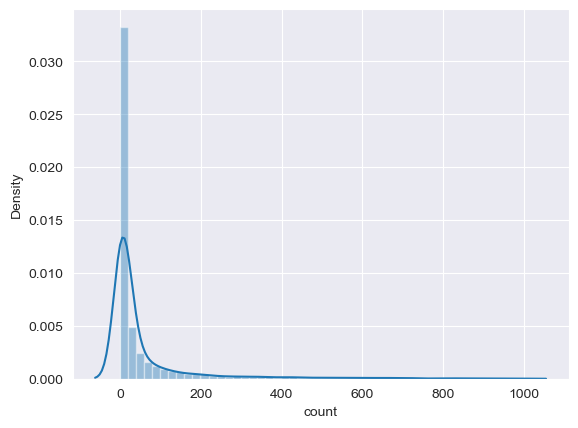

In [66]:
sns.distplot(low_accident_cities)
